# Prediction of Campus Placement
###### In this project, we used various machine learning algorithm  to predict the placement of students, Using Kaggle dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

import warnings
warnings.filterwarnings('ignore')

## Gathering data

In [2]:
data=pd.read_csv('placement_check_refer.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


This data set consists columns are

sscb- Secondary School Certificate Board-> Which is lower secondary school(1st-10th Grade)

hscb-Higher Secondary Certificate Board-> Which is higher secondary school(11th and 12th Grade)

sl_no : serial number
gender : [male,female]
ssc_p : means--> 10th class percentage

ssc_b : which board to passed out 10th.

hsc_p : means--> 12th class percentage

hsc_b : which board to passed out 12th.

hsc_s : which stream he choose (science,commerce,arts)

degree_p : means--> Bachelor degree percentage

degree_t : which strem choose for bachelor

workex : It has a work experience or not.

etest_p : entrance test percentage

specialisation : Master degree in Mkt&HR or Mkt&Fin

mba_p : means--> Master degree percentage

status : He/She got placed or not in campus placement.

salary : placement packages.

Grade represents their year of study in school. Boards are different curriculum/education system adapted by educational institutions.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
data.shape

(215, 15)

In [5]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
data.set_index('sl_no',inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
data.duplicated().sum()

0

### cleaning the data

In [9]:
data.salary=data.salary.fillna(data.salary.mean())

In [10]:
print(data['gender'].unique())
print(data['status'].unique())
print(data['workex'].unique())
print(data['hsc_b'].unique())
print(data['ssc_b'].unique())

['M' 'F']
['Placed' 'Not Placed']
['No' 'Yes']
['Others' 'Central']
['Others' 'Central']


In [11]:
#make a duplicate of data 
import copy
data1=copy.deepcopy(data)

In [12]:
# Categorical columns coverted into numerical using Label encoding
le=LabelEncoder()
l=['gender','status','workex','hsc_b','ssc_b']

In [13]:
for i in l:
    if data1[i].dtypes=='object':
        data1[i]=le.fit_transform(data1[i])

In [14]:
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int32  
 13  salary          215 non-null    float64
dtypes: float64(6), int32(5), object(3)
memory usage: 21.0+ KB


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          215 non-null    float64
dtypes: float64(6), object(8)
memory usage: 25.2+ KB


In [17]:
num_data=data1.select_dtypes(['int32','float64'])

### Visualizing the data

##### Pie chart of male and female

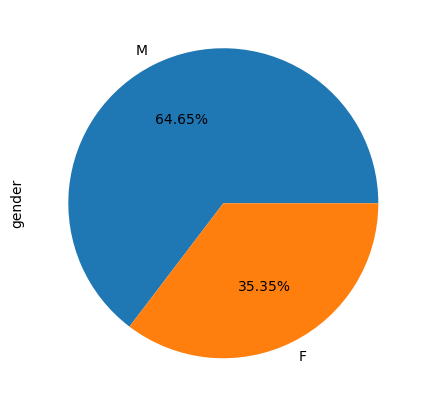

In [18]:
plt.figure(figsize=(5,10))
data.gender.value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

##### No. of student who got placement or not

Number of students not get placed = 148
Number of students get placed =67


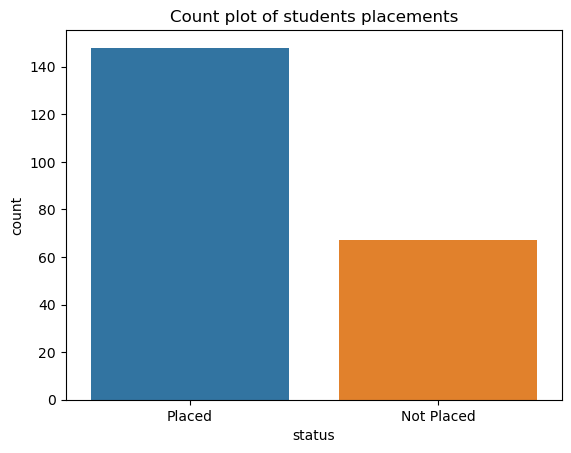

In [19]:
print(f'Number of students not get placed = {data.status.value_counts()[0]}') 
print(f'Number of students get placed ={data.status.value_counts()[1]}')
plt.title('Count plot of students placements')
sns.countplot(data=data,x='status')
plt.show()

##### average percentage of all education qualification

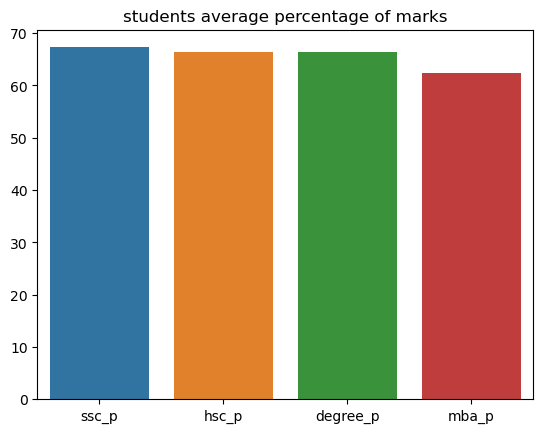

In [20]:
sns.barplot(x=['ssc_p','hsc_p','degree_p','mba_p'],y=[data.ssc_p.mean(),data.hsc_p.mean(),data.degree_p.mean(),data.mba_p.mean()])
plt.title('students average percentage of marks')
plt.show()

##### no. of males and females who got placement or not

In [21]:
def count_placement(gender_=0,status_=0):
    j=0
    for i in range(len(data)):
        i=i+1
        if data1['gender'][i]==gender_ and data1['status'][i]==status_:
            j+=1
    if gender_==0 and status_==0:
        print("Total female who don't get placement is "+str(j))
    if gender_==0 and status_==1:
        print("Total female who get placement is "+str(j))
    if gender_==1 and status_==0:
        print("Total male who don't get placement is "+str(j))
    if gender_==1 and status_==1:
        print("Total male who get placement is "+str(j))
    

    return j
    

In [22]:
np_female=count_placement(0,0)
p_female=count_placement(0,1)
np_male=count_placement(1,0)
p_male=count_placement(1,1)

Total female who don't get placement is 28
Total female who get placement is 48
Total male who don't get placement is 39
Total male who get placement is 100


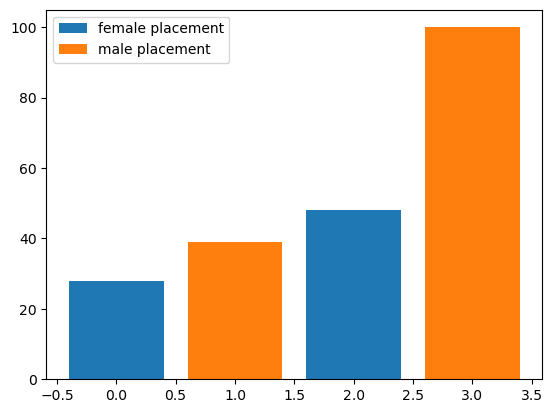

In [23]:
plt.bar([0,2],height=[np_female,p_female])
plt.bar([1,3],height=[np_male,p_male])
plt.legend(['female placement', 'male placement'])
plt.show()

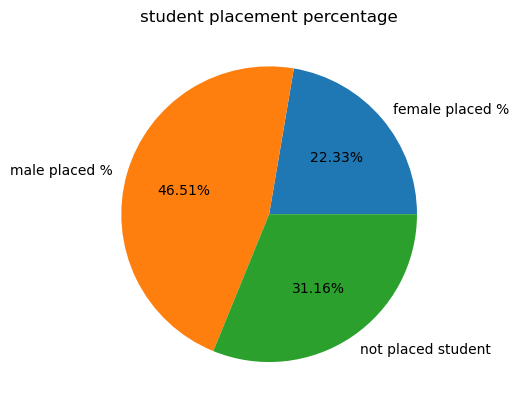

In [24]:
##calculate percentage , plot pie chart of placeement
plt.pie([p_female/len(data1)*100,p_male/len(data1)*100,np_female/len(data1)*100+np_male/len(data1)*100],
        labels=["female placed %","male placed %",'not placed student'],
        autopct='%1.2f%%')
plt.title('student placement percentage')
plt.show()

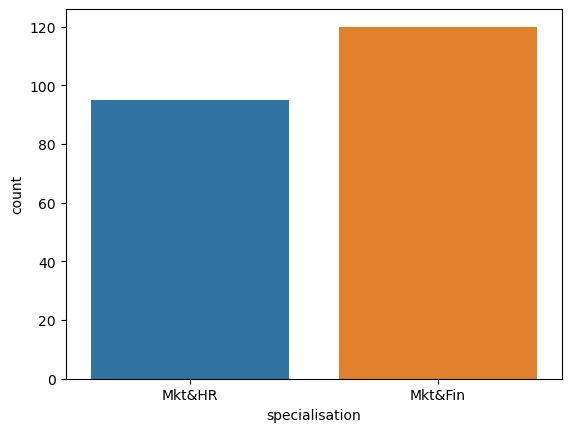

In [25]:
sns.countplot(x=data['specialisation'])
plt.show()

#### Which factor influenced a candidate in getting placed?

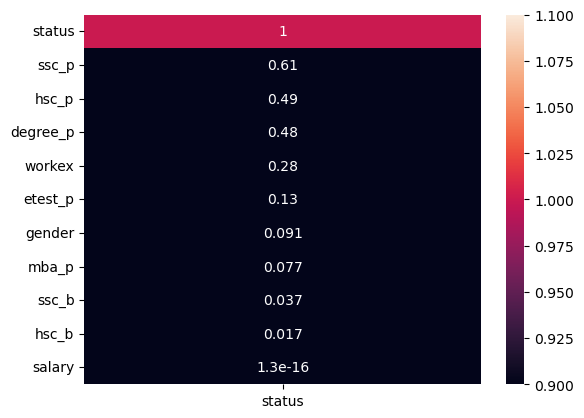

In [26]:
sns.heatmap(data1.corr()[['status']].sort_values(by='status',ascending=False),vmin=1,vmax=1,annot=True)
plt.show()

See the Above graph We can say percentage matter. and ssc_p feature data factor influenced a candidate in getting placed.
when we see the correlation between features and placement then it show me the ssc_p data to more correlated to placcement.
I know it is some tricky to say that masters (mba_p)percentage is not so much help in real world placement.
After see the correlation between features and placement the we definatly say the percentage matters for get a placed.
So we consider ssc_p,hsc_p,degree_p are correlated to status as compared to other features.

In [27]:
data1.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,Mkt&HR,58.80,1,270000.000000
2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,Mkt&Fin,66.28,1,200000.000000
3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,Mkt&Fin,57.80,1,250000.000000
4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,Mkt&HR,59.43,0,288655.405405
5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,Mkt&Fin,55.50,1,425000.000000


## Placement Prediction 
###### Predictiction model using different ML algorithms?

In [28]:
#Splitting the dataset into the Training and Test set
x=data1.iloc[:,[1,3,6]].values
y=data1.iloc[:,-2].values

In [29]:
models={'Linear':LinearRegression(),
       'Lasso':Lasso(),
       'Ridge':Ridge(),
       'AdaBooost':AdaBoostRegressor(),
       'GradientBossting':GradientBoostingRegressor(),
       'Decisiontree':DecisionTreeRegressor(),
       'Randomforest':RandomForestRegressor(),
       'svm':LinearSVR()}

In [30]:
sc=StandardScaler()

In [31]:
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i,shuffle=True)
    x_train=sc.fit_transform(x_train)
    x_test=sc.fit_transform(x_test)
    for name,model in models.items():
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        train_s=model.score(x_train,y_train)
        test_s=model.score(x_test,y_test)
        mse=mean_squared_error(y_test,y_pred)
        rmse=np.sqrt(mse)
        if test_s>0.65 and train_s>0.65:
            print(i)
            print(name)
            print('training score : ',train_s*100)
            print('testing_score : ',test_s*100)
            print('accuracy : ',r2_score(y_test,y_pred)*100)

25
Decisiontree
training score :  100.0
testing_score :  68.22660098522168
accuracy :  68.22660098522168
30
GradientBossting
training score :  87.99718208269525
testing_score :  67.65633757894776
accuracy :  67.65633757894776
30
Randomforest
training score :  90.24361581920904
testing_score :  74.16692307692307
accuracy :  74.16692307692307
55
Randomforest
training score :  91.87397494846995
testing_score :  67.5487684729064
accuracy :  67.5487684729064
77
Randomforest
training score :  91.18637820512821
testing_score :  70.63714285714286
accuracy :  70.63714285714286
99
Randomforest
training score :  90.80266009852217
testing_score :  68.99235795454545
accuracy :  68.99235795454545


From this we find out which model have the best score and random state 77 gives the best of it.

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=77,shuffle=True)

In [33]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [34]:
for name,model in models.items():
        print(name)
        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        train_s=model.score(x_train,y_train)
        test_s=model.score(x_test,y_test)
        mse=mean_squared_error(y_test,y_pred)
        rmse=np.sqrt(mse)
        print('training score : ',train_s)
        print('testing_score : ',test_s)
        print('accuracy : ',r2_score(y_test,y_pred))
        print('rmse : ',rmse)

Linear
training score :  0.40388906055308094
testing_score :  0.5249879813238443
accuracy :  0.5249879813238443
rmse :  0.3284796647077975
Lasso
training score :  0.0
testing_score :  -0.009523809523809046
accuracy :  -0.009523809523809046
rmse :  0.47886651818544185
Ridge
training score :  0.4038840481969541
testing_score :  0.5245537288417211
accuracy :  0.5245537288417211
rmse :  0.3286297772504205
AdaBooost
training score :  0.5223101997495463
testing_score :  0.6276860488085207
accuracy :  0.6276860488085207
rmse :  0.29081101000009424
GradientBossting
training score :  0.880731471573203
testing_score :  0.6395563981648039
accuracy :  0.6395563981648039
rmse :  0.2861375472180321
Decisiontree
training score :  1.0
testing_score :  0.692857142857143
accuracy :  0.692857142857143
rmse :  0.26413527189768715
Randomforest
training score :  0.9096200641025641
testing_score :  0.6912600000000001
accuracy :  0.6912600000000001
rmse :  0.2648211331411063
svm
training score :  0.3866286483

We select Random Forest Regressor model to predict the campus placement

In [35]:
model=RandomForestRegressor()

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
y_pred=model.predict(x_test)

In [38]:
print('training score : ',model.score(x_train,y_train)*100)
print('testing_score : ',model.score(x_test,y_test)*100)
print('accuracy : ',r2_score(y_test,y_pred))

training score :  90.7288141025641
testing_score :  68.82807142857143
accuracy :  0.6882807142857144


# Result
#### we can see the prediction and say that Random Forest Regressor model is better perform then other models and the accuracy score in 71%.

In [39]:
pd.DataFrame(zip(y_test,y_pred),columns=['Actual','predicted'])

,Actual,predicted
0,1,0.74
1,1,0.88
2,0,0.77
3,1,0.81
4,1,0.87
5,1,0.36
6,1,0.81
7,0,0.22
8,0,0.40
9,0,0.08


In [40]:
#if the predicted value is greater than 0.5 , i will considered as 1 ,otherwise it gives 0
for i in range(len(y_pred)):
    y_pred[i]=round(y_pred[i])

In [41]:
pd.DataFrame(zip(y_test,y_pred),columns=['Actual','predicted'])

,Actual,predicted
0,1,1.0
1,1,1.0
2,0,1.0
3,1,1.0
4,1,1.0
5,1,0.0
6,1,1.0
7,0,0.0
8,0,0.0
9,0,0.0
